<a href="https://colab.research.google.com/github/devdongnim/GoogleColab-MLstudy/blob/main/%ED%98%BC%EA%B3%B5_MLDL_1_3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#도미 분류하기


In [2]:
#도미 데이터 https://bit.ly/bream_list

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

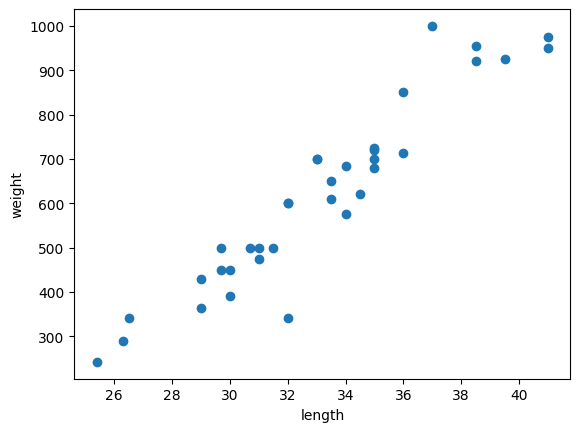

In [3]:
# 산점도(scatter plot)

import matplotlib.pyplot as plt  #맷플롯립

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
#빙어 데이터

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

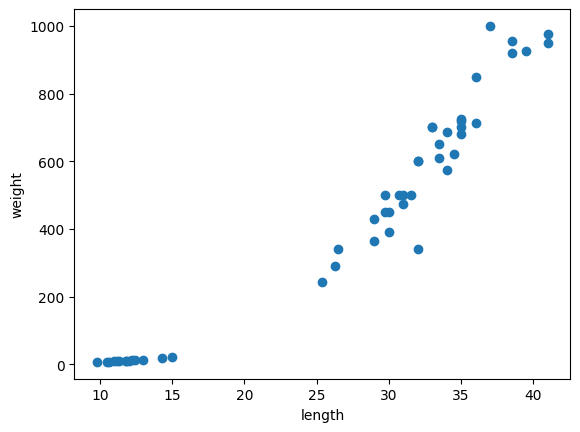

In [14]:
# 리스트 합치기
# 사이킷런에서는 2차원 리스트 만들어야함
length = bream_length+ smelt_length
weight = bream_weight+ smelt_weight
plt.scatter(length, weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
#리스트 내포 구문(zip함수 사용)

fish_data=[[l,w] for l,w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [18]:
#정답 리스트
fish_target=[1]* 35 +[0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
# K-최근접 이웃

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()  #KNeighborsClassifier클래스의 객체생성
kn.fit(fish_data,fish_target) #fit 메소드 => 머신러닝 모델,  알고리즘이 객체화 된것을 모델이라고 함, 종종 알고리즘 자체를 모델이라고 하기도 함
kn.score(fish_data, fish_target) #score 메소드, 얼마나 학습을 잘했는지 확인

1.0

In [23]:
#새로운 생선 예측 길이30cm, 무게:600g, 길이35cm, 무게:650g

kn.predict([[30,600],[35,650]])

array([1, 1])

In [28]:
# K-최근접 이웃 알고리즘은 가까운 데이터 참조함, 기본값은 5개

# 변경
kn49= KNeighborsClassifier(n_neighbors=49) #참고데이터 49개
kn49.fit(fish_data, fish_target)  # 49개중에 많은것을 고르면 도미가 무조건 다수이므로 전부 도미로 인식함
kn49.score(fish_data, fish_target)

0.7142857142857143

In [31]:
#4
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5,50):
    #k-최근접 이웃 개수 설정
    kn.n_neighbors = n   # 이 라인을 완성해보세요
    #점수 계산
    score = kn.score(fish_data, fish_target) #  이 라인을 완성해 보세요
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n,score)
        break

18 0.9795918367346939
